## Exploratory Data Analysis

In [1]:
# Installing required libraries
!pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 97.8 MB/s eta 0:00:0031m110.0 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 100.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 101.1 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)


In [2]:
# Import functions
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from scipy import stats
from sklearn.preprocessing import StandardScaler


In [5]:
df.head()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,+1-820-643-5431x47576,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,343.975.4702x9340,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615940 entries, 0 to 1615939
Data columns (total 23 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Job Id            1615940 non-null  int64         
 1   Experience        1615940 non-null  object        
 2   Qualifications    1615940 non-null  object        
 3   Salary Range      1615940 non-null  object        
 4   location          1615940 non-null  object        
 5   Country           1615940 non-null  object        
 6   latitude          1615940 non-null  float64       
 7   longitude         1615940 non-null  float64       
 8   Work Type         1615940 non-null  object        
 9   Company Size      1615940 non-null  int64         
 10  Job Posting Date  1615940 non-null  datetime64[ns]
 11  Preference        1615940 non-null  object        
 12  Contact Person    1615940 non-null  object        
 13  Contact           1615940 non-null  object

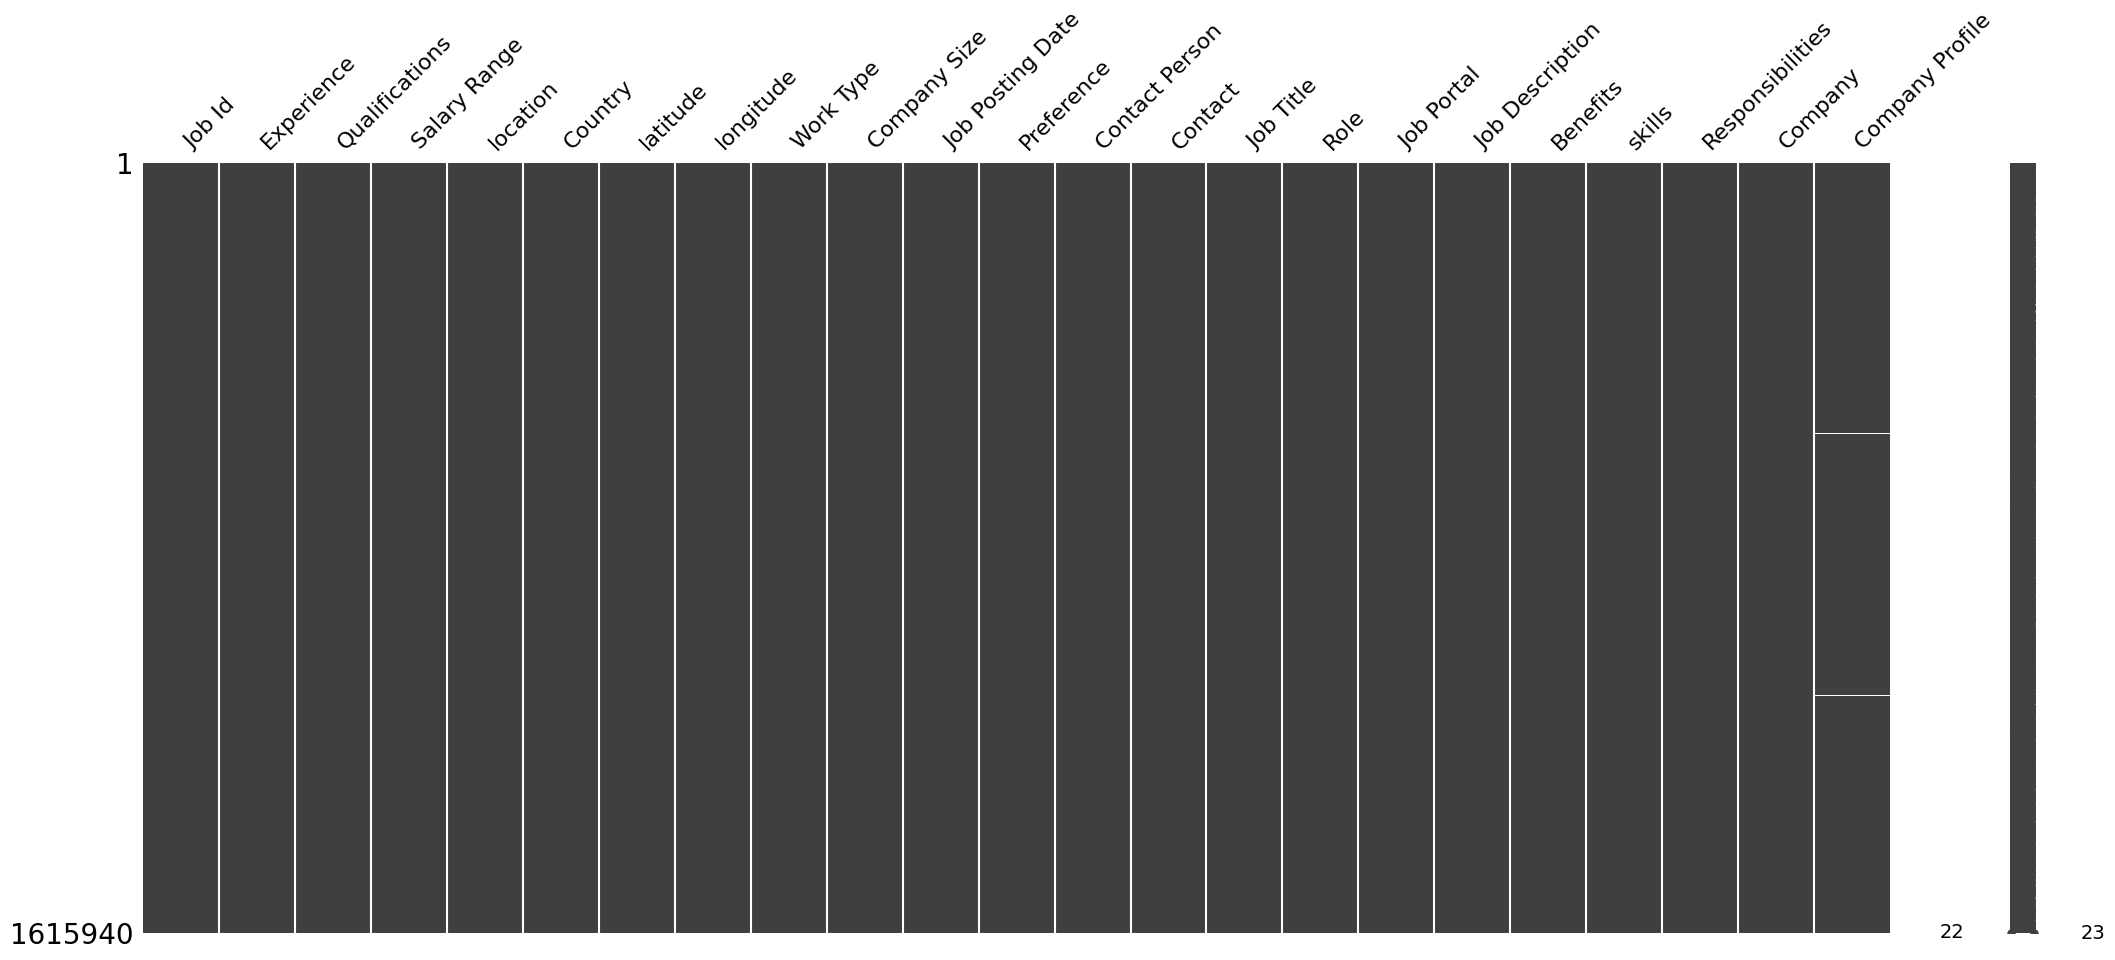

Missing Values:
 Company Profile    5478
dtype: int64
Number of duplicate rows: 0
Outlier counts per numeric column: {'latitude': 0, 'longitude': 127102, 'Company Size': 0}
Skewness:
 latitude       -0.202949
longitude      -0.032941
Company Size    0.002142
dtype: float64


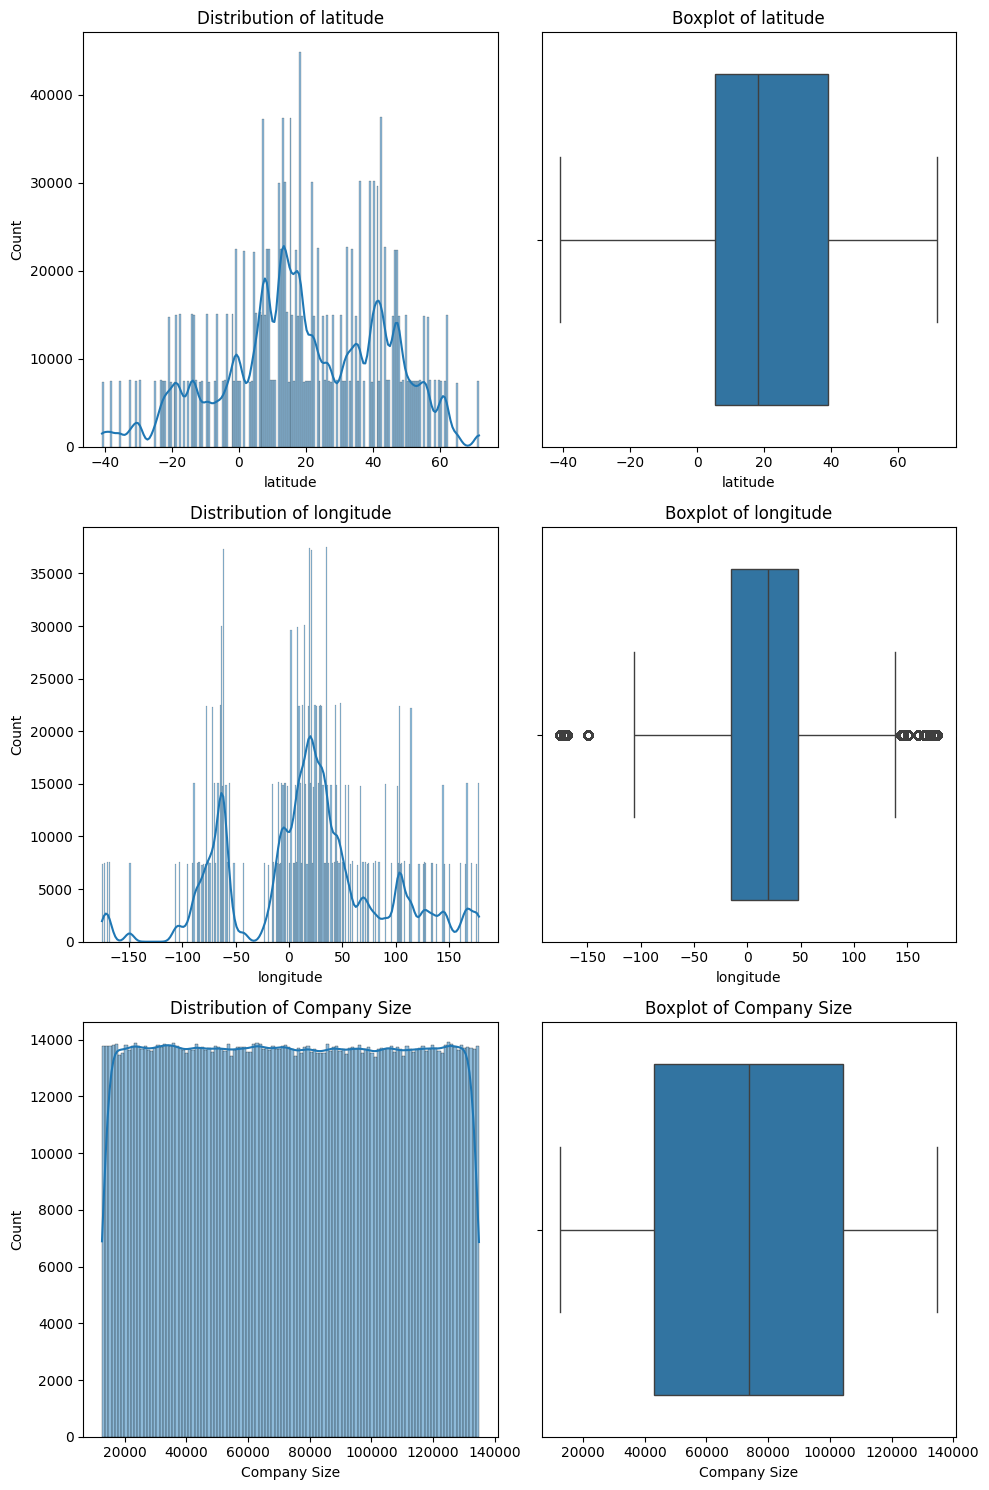

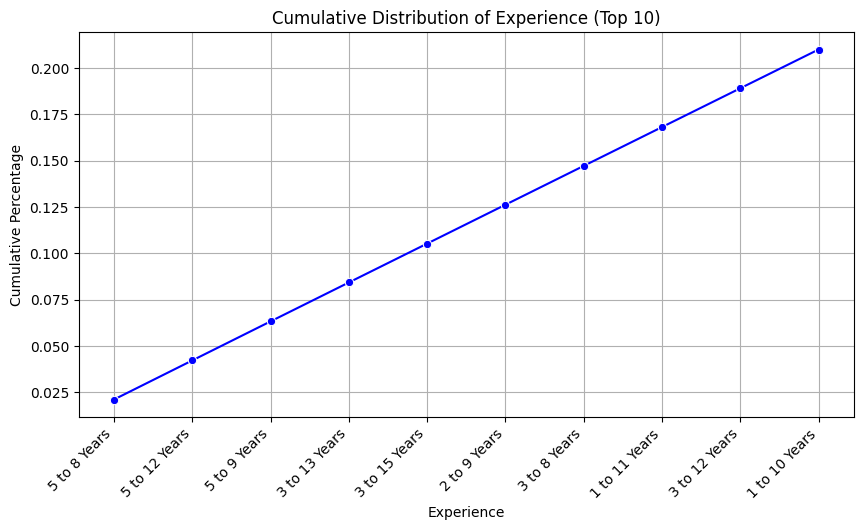

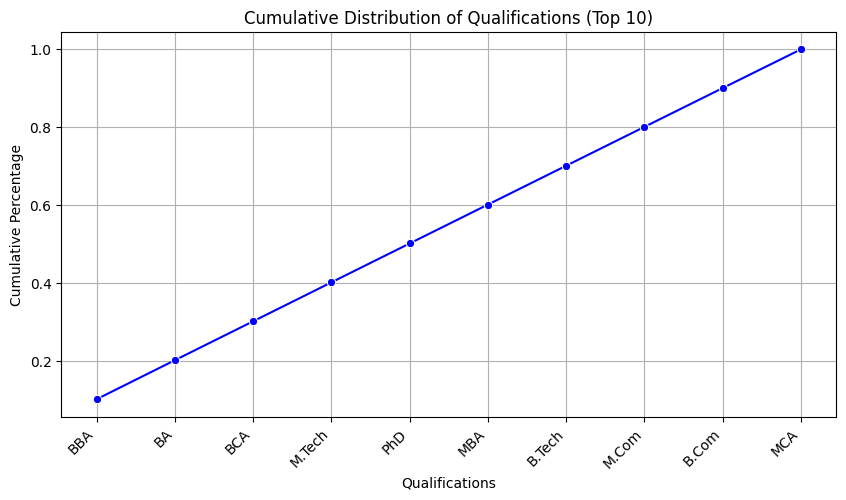

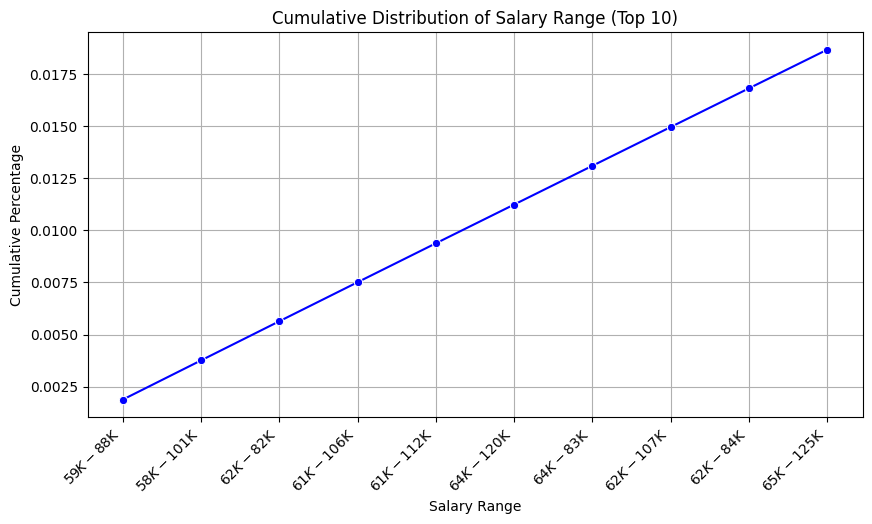

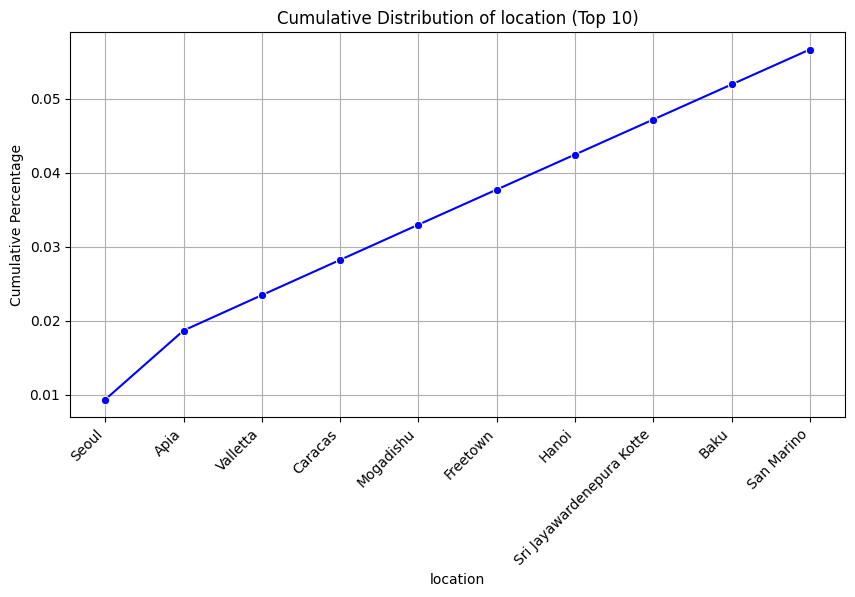

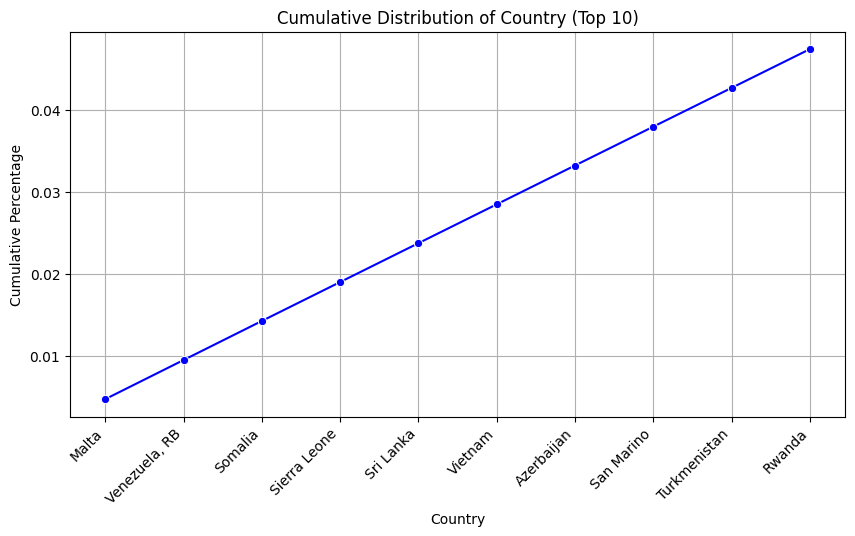

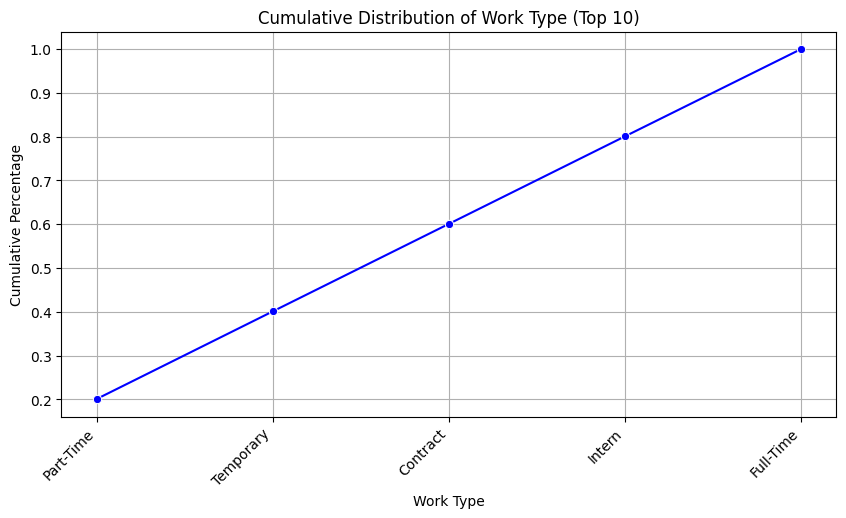

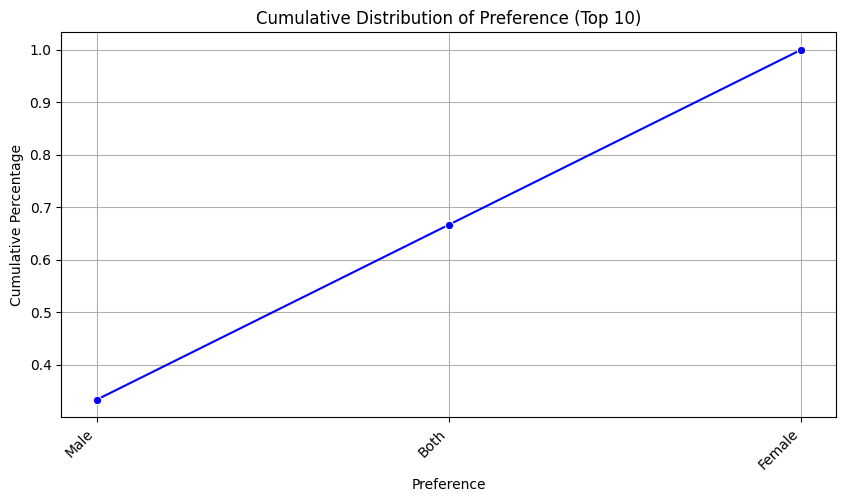

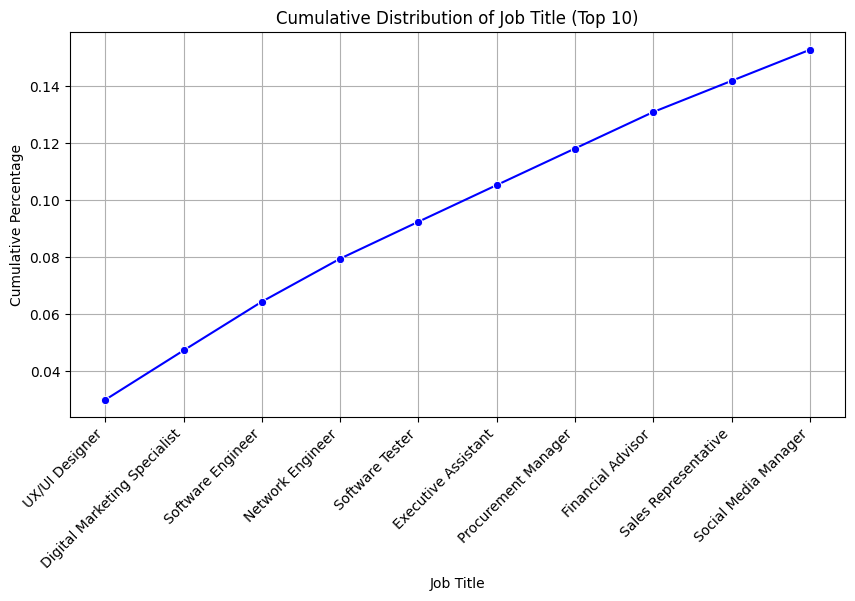

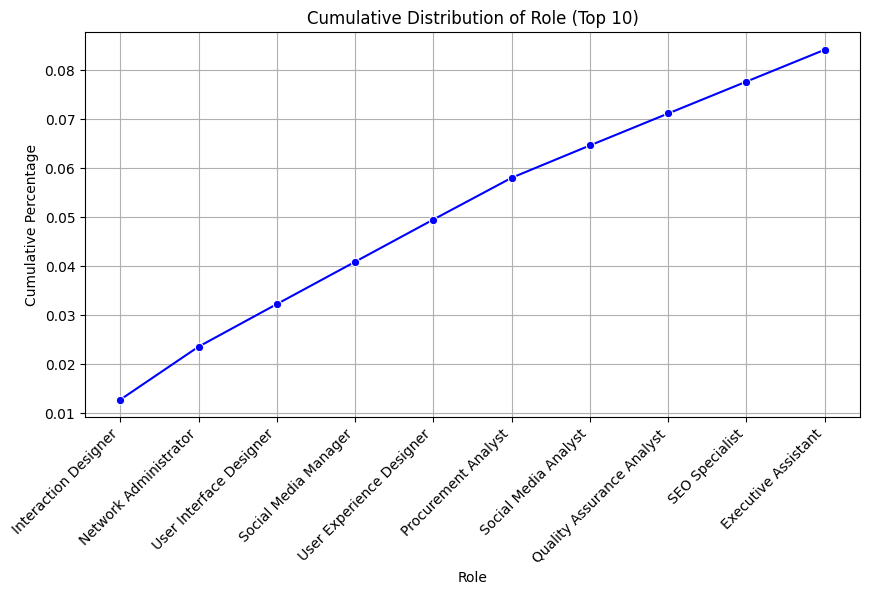

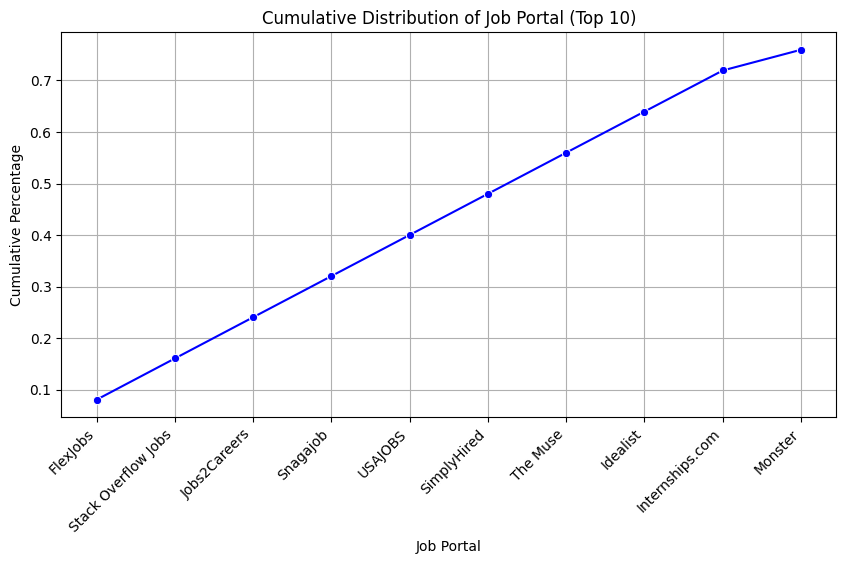

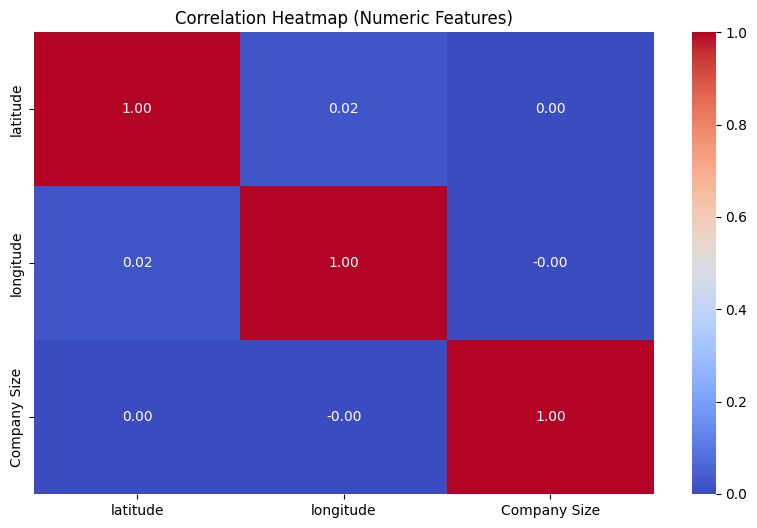


Cramér's V values between selected categorical pairs:
Cramér's V between 'location' and 'Country': 1.00
Cramér's V between 'Job Title' and 'Role': 1.00
Cramér's V between 'Work Type' and 'Preference': 0.00


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from scipy import stats
import scipy.stats as ss  # Required for Cramér’s V

# Load dataset (replace with actual file path)
df = pd.read_csv("job_descriptions.csv")

# Convert date column to datetime
df["Job Posting Date"] = pd.to_datetime(df["Job Posting Date"], errors='coerce')

# Basic info
print(df.info())
print(df.describe(include="all"))

# Check for missing values
msno.matrix(df)
plt.show()

# Count missing values per column
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

# Check for duplicate entries
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Identify column types
numeric_cols = ["latitude", "longitude", "Company Size"]
categorical_cols = ["Experience", "Qualifications", "Salary Range", "location", "Country",
                    "Work Type", "Preference", "Job Title", "Role", "Job Portal"]
date_cols = ["Job Posting Date"]
text_cols = ["Job Description", "Benefits", "skills", "Responsibilities", "Company Profile"]

# Detect outliers using IQR method (for numeric columns only)
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

outliers = {col: detect_outliers_iqr(df, col) for col in numeric_cols}
outlier_counts = {col: len(outliers[col]) for col in numeric_cols}
print("Outlier counts per numeric column:", outlier_counts)

# Check skewness of numerical columns
skewness = df[numeric_cols].apply(lambda x: stats.skew(x.dropna()))
print("Skewness:\n", skewness)

# Visualizing distributions for numeric columns
fig, axes = plt.subplots(len(numeric_cols), 2, figsize=(10, len(numeric_cols) * 5))
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], ax=axes[i, 0], kde=True)
    sns.boxplot(x=df[col], ax=axes[i, 1])
    axes[i, 0].set_title(f'Distribution of {col}')
    axes[i, 1].set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Function to plot cumulative distribution function (CDF) for categorical features
def plot_categorical_cdf(data, col, top_n=10):
    plt.figure(figsize=(10, 5))
    category_counts = data[col].value_counts(normalize=True).cumsum()
    
    sns.lineplot(x=category_counts.index[:top_n], y=category_counts.values[:top_n], marker="o", color="blue")
    plt.xticks(rotation=45, ha="right")
    plt.title(f"Cumulative Distribution of {col} (Top {top_n})")
    plt.xlabel(col)
    plt.ylabel("Cumulative Percentage")
    plt.grid()
    plt.show()

# Apply to categorical columns
for col in categorical_cols:
    plot_categorical_cdf(df, col, top_n=10)  # Adjust top_n as needed

# Correlation heatmap for numeric values
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

# --- NEW: Cramér's V for categorical association ---
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

print("\nCramér's V values between selected categorical pairs:")
pairs_to_check = [("location", "Country"), ("Job Title", "Role"), ("Work Type", "Preference")]
for x, y in pairs_to_check:
    try:
        value = cramers_v(df[x], df[y])
        print(f"Cramér's V between '{x}' and '{y}': {value:.2f}")
    except Exception as e:
        print(f"Could not compute Cramér's V for {x} and {y}: {e}")




## Findings

Based on the data, we can choose to remove longitude and latitude as it might not be relevant to the model.

Another point to note is that there might be large differences in salary range, we will need to do a different grouping (group by job title) before looking for data skew.

Quite a big number of entries are UI/UX designers, data is a little skewed (Might need to remove these data points).

Experience is has multiple overlapping ranges, will need to look into how we can standardize these ranges to reduce variation and spot outlier ranges (for e.g., 3-15 years as a range)

Company size distribution and academic qualification is pretty well spread, no changes needed.

Company description MIGHT be useful (can use to see if it aligns with job seeker's preferences).
Will need to remove NaN values first before using.

After using Cramer's V, should drop country (skewed towards korea + redundant) and keep location (more granularity). Similarly, can drop job title (map back to job title as output feature using role).

We also remove dates in the training process.

**1st Iteration of Feature selection:**

numeric_cols = ["Company Size"]

categorical_cols = ["Experience", "Qualifications", "Salary Range", "location",
                    "Work Type", "Preference", "Role", "Job Portal"]

text_cols = ["Job Description", "Benefits", "Skills", "Responsibilities", "Company Profile"]